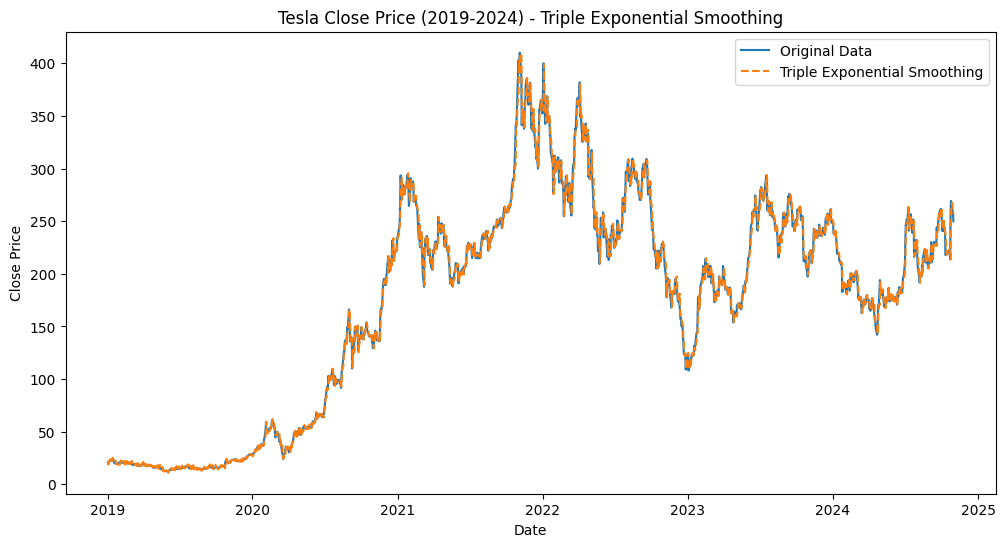

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the dataset and convert the 'Date' column to datetime format
tesla_data = pd.read_csv('Tesla_Close_2019_2024.csv')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Set 'Date' as the index and define frequency explicitly as business days ('B')
tesla_data.set_index('Date', inplace=True)
tesla_data = tesla_data.asfreq('B').ffill()  # Fill any missing dates with the previous value

# Apply Triple Exponential Smoothing with a smaller seasonal period (e.g., 30 days for monthly seasonality)
model = ExponentialSmoothing(
    tesla_data['Close'], 
    seasonal='add', 
    seasonal_periods=30,  # Adjusted for monthly seasonality
    trend='add', 
    initialization_method="estimated"
)
fit = model.fit()

# Plot the original data and the smoothed values
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Close'], label='Original Data')
plt.plot(fit.fittedvalues, label='Triple Exponential Smoothing', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Close Price (2019-2024) - Triple Exponential Smoothing')
plt.legend()
plt.show()
